# Reference

https://www.kaggle.com/datasets/shamstabrezkhan/happy-and-sad-images-dataset-for-cnn

# Introduction

As a data scientist in an entertainment company, my goal is to see if people who are visiting us are happy or sad within our enterainment shows.
I will use CNN model for this dataset "happy or sad dataset", that consists of labeled images that i categorized into 2 classes Happy(1), sad(0). So my goal is to classify the images based on the image recognition and emotional expression. This will help us to understand whether we need to imporve our shows or not.


# Problem statement

The primary goal is to develop a binary classification model, so I will use CNN model to predict the images have a happy or sad emotions. My test include so many steps and stages like preprocessing the images, designing and visualizing the moel ending by training the model and evaluating it.

# Import libraries

In [ ]:
!pip install kagglehub
import kagglehub
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

Import the needed libraries

# Import dataset from kaggle

In [ ]:
path = kagglehub.dataset_download("shamstabrezkhan/happy-and-sad-images-dataset-for-cnn")
print("Path to dataset files:", path)

100%|██████████| 186M/186M [00:02<00:00, 69.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shamstabrezkhan/happy-and-sad-images-dataset-for-cnn/versions/1


Import the path of dataset from kaggle

# Define the path

In [ ]:
data_dir = path
print(os.listdir(data_dir))

['happy', 'sad']


Define the path of dataset to make it more easy and then check the structure of the file as (happy and sad)

# CNN model

# Parameters

In [ ]:
img_size = (64, 64)
batch_size = 32
input_shape = (64, 64, 3)

Starting by defining the parameters for CNN model.

*   Resize all the images size to 64 to make it uniformity and make the process more easy.
*   then identify 32 batch size as to process 32 images together in each training step.
*   then the input of the shape will be 64*64 pixels and will have 3 colors.





# Splitting the data

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

Inzialize an imagedatagenerator for preprocessing and the augmentation.

*   The rescale normalize the pixel values of images.
*   Then splitting the data into training(80%) and validation(20%).



# Preparing the data

In [ ]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)


val_generator = datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 1298 images belonging to 2 classes.
Found 324 images belonging to 2 classes.


Training Generator:
*   Loading the image from its path, and resize them and prepare the batches as defined in the previous code(64*64 pixels)(32 batches)
*   then the binary classification to be happy and sad
*   shuffling the data to prevent the overfitting

Validation:
*   Using 20% from data as validation
*   resize the images and process them in batches also

# Visualizing the data

(64, 64, 3)


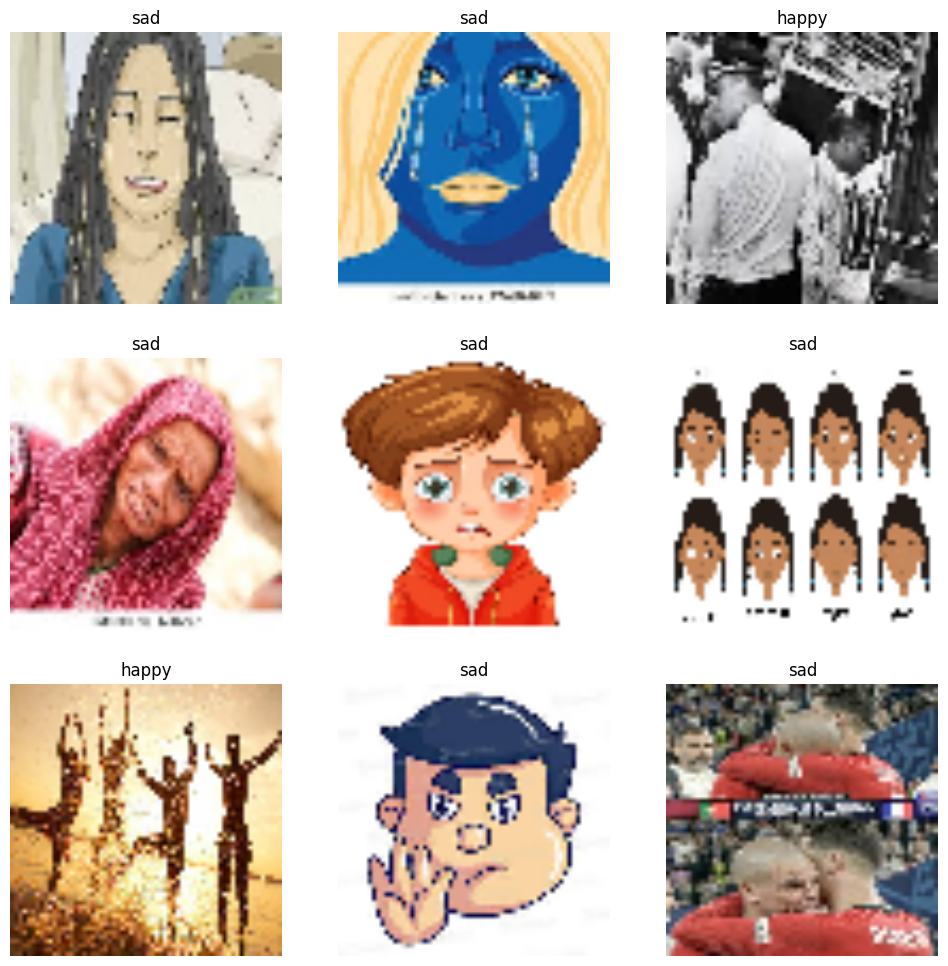

In [ ]:
img_size = (128, 128)
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(12, 12))
images, labels = next(train_generator)
print(images[0].shape)

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = images[i] * 255.0
    image = image.astype("uint8")
    plt.imshow(image, interpolation='bilinear')
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

plt.show()

*   Started by resizing the quality of images to be 128*128 pixels instead of 64 cause the quality was so bad.
*   then retrieve the class name from (train generator)
*   then creating the plot (to let the images 12*12 inches)
*   retrieve the next batch of images with the corresponding labels to work with a single batch.
*   then display 9 images
*   add the class name for each image as(happy/sad)
*   then show the plot











# Designing the model

In [ ]:
model = Sequential()
model.add(tf.keras.Input(shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

*   Intiazlize a sequential model and add input layer with 64x64 RGB images.(convolutional layers)
*   I tried here 10 layers to check the best accuracy.
*   convert the 3D output to 1D to dense the layers(flatten).
*   dropping 50% of neurons to prevent the overfitting.
*   stabilize the training by normalizing the layers outputs.
*   then for binary classification a single unit with a sigmid activation(so when the value is closer to 1 it means happy, when the value closer to 0 it means sad)

# Train the model

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5753 - loss: 0.6941

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 563ms/step - accuracy: 0.5749 - loss: 0.6941 - val_accuracy: 0.5741 - val_loss: 0.6870
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 528ms/step - accuracy: 0.6006 - loss: 0.6701 - val_accuracy: 0.5741 - val_loss: 0.6789
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 558ms/step - accuracy: 0.5926 - loss: 0.6371 - val_accuracy: 0.6975 - val_loss: 0.6720
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - accuracy: 0.6522 - loss: 0.5981 - val_accuracy: 0.7562 - val_loss: 0.6277
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 532ms/step - accuracy: 0.7000 - loss: 0.5518 - val_accuracy: 0.6883 - val_loss: 0.6162
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 523ms/step - accuracy: 0.7190 - loss: 0.5144 - val_accuracy: 0.7191 - val_loss: 0.7251
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 550ms/step - accuracy: 0.7525 - loss: 0.4805 - val_accuracy: 0.7222 - val_loss: 0.6187
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 524ms/step - accuracy: 0.7565 - loss: 0.4750 - val_accuracy: 0.750



*   Here is the data generator for the training dataset.
*   then the epochs which specify the number of times the model will go through the training dataset.



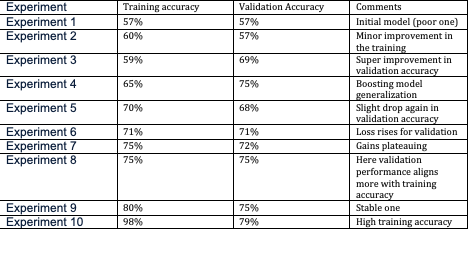

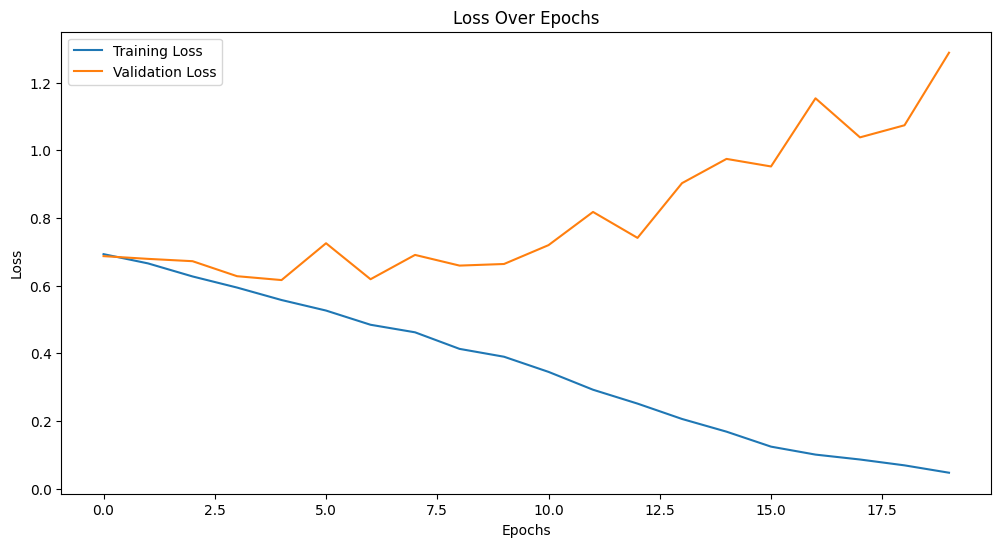

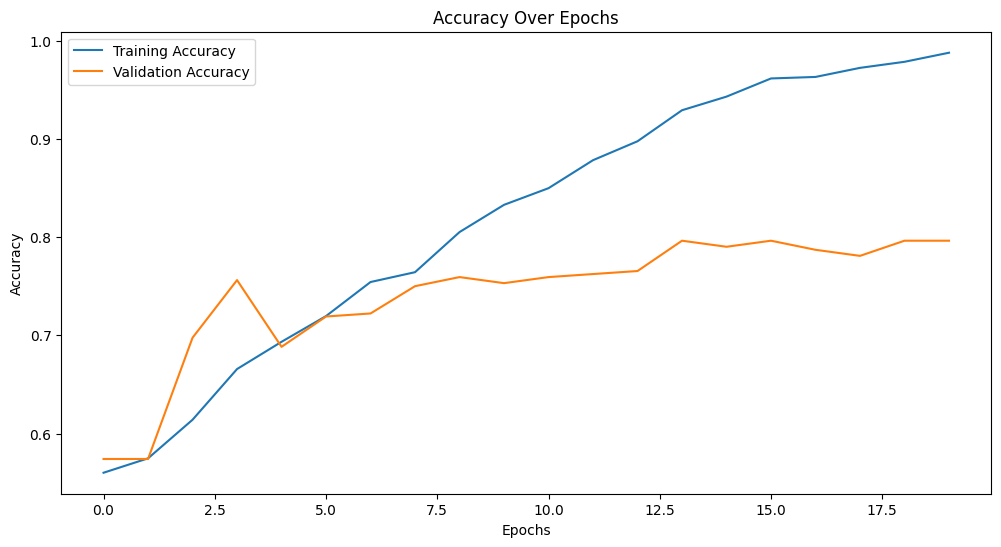

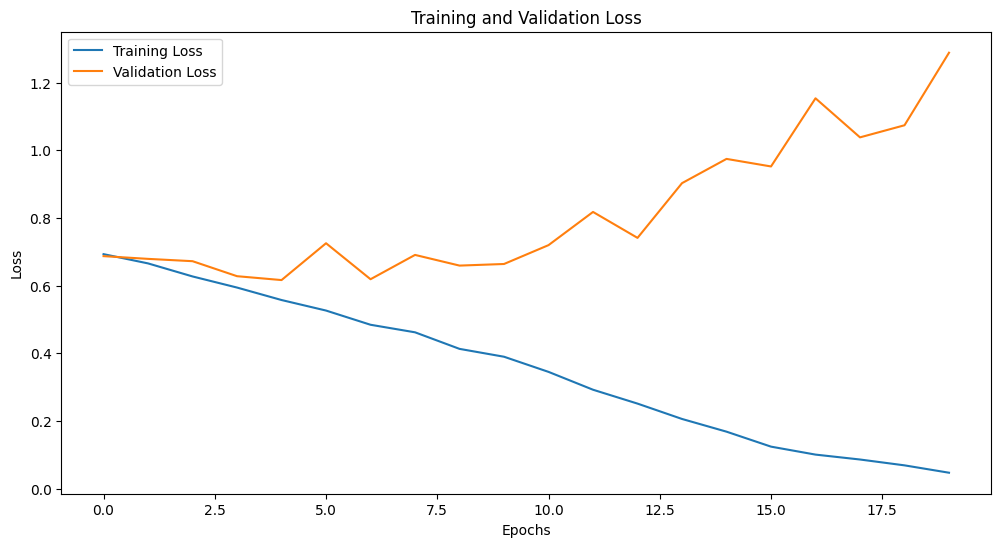

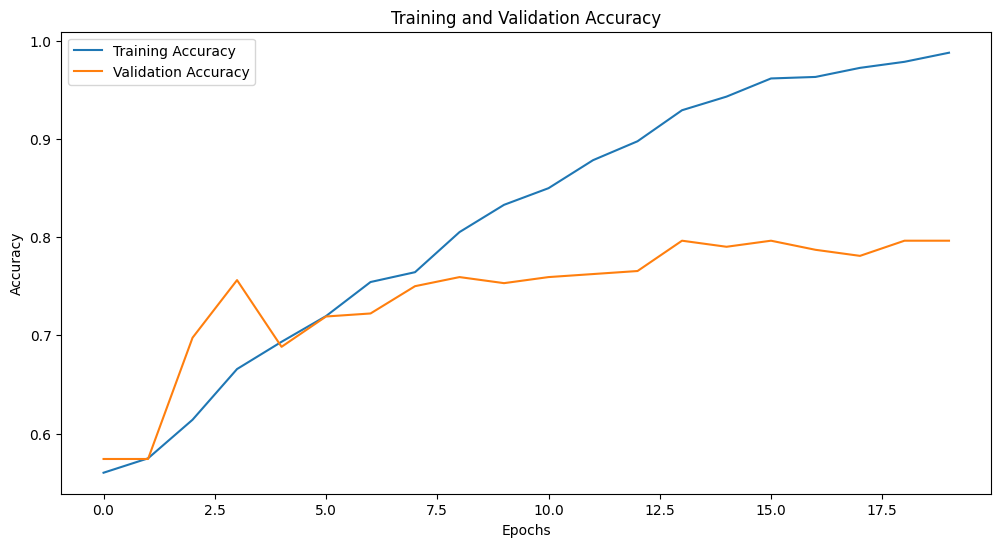

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

I created those 2 plots to help in analyzing the training dynamics for the model by comparing their performance on training and validation.

# Evaluate the model

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.8002 - loss: 1.2283
Validation Loss: 1.2882225513458252
Validation Accuracy: 0.7962962985038757




*   Evaluate the validation data to check how well it performs on data.
*   then loss and accuracy to check if the model overfitting or working well.



# Conclusion

The (dense_1) layer with (sigmoid) function showed us the most effiecient improvement accuracy during the training.

By the end of this task of emotion detection and image recongnition, and by using CNN technique, the trained model after the preprocessing, visualization, designing and training achieve a good accuracy and demonstrate the power of CNN for binary image classification, and this for sure helped us as an entertainment company to detect the customers expressions, which helped us to improve our next shows.

# References

https://www.atmosera.com/blog/convolutional-neural-networks/